# Canonical problem 1

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Problem 2


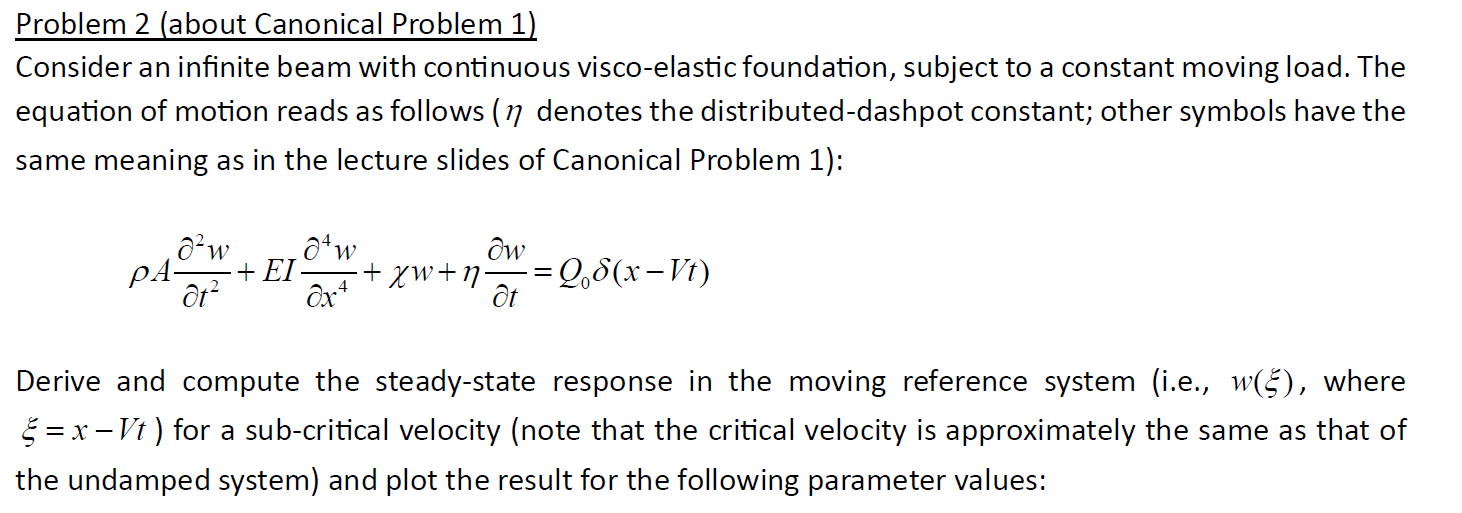

The solution of the equation of motion for damped system is:

$$
w(\xi) = \frac{1}{2 \pi} \frac{1}{V} \frac{Q_0}{E I} \int_{-\infty}^{+\infty} \frac{\mathrm{e}^{-\mathrm{i} \frac{\omega}{V} \xi}}{\Delta(\omega, V)} d\omega 
$$

in which

$$
\Delta(\omega, V)=\left(\frac{\omega}{V}\right)^4-\frac{\rho A}{E I} \omega^2+ i\frac{\eta}{E I} \omega+\frac{\chi}{E I}
$$

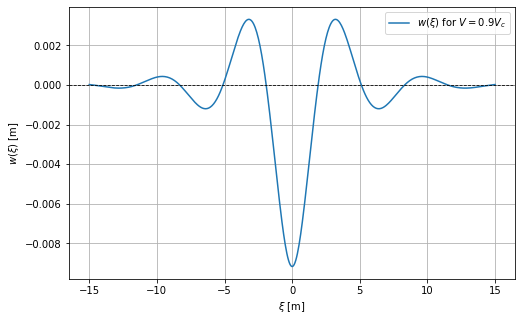

In [2]:
# Define constants
rhoA = 268.3
EI = 6.42e6
chi = 7.3e6
eta = 1e2
Q0 = 80e3
Vc = (4 * chi * EI / (rhoA**2))**(1/4)
V = 0.9 * Vc

# Integrand
def integrand(omega, xi):
    Delta = (omega / V)**4 - (rhoA / EI) * omega**2 + (chi / EI) + 1j * eta / EI
    return np.exp(-1j * omega * xi / V) / Delta

# Calculate the w_xi function with numerical integration
def w_xi_func(xi):
    result, _ = quad(lambda omega: integrand(omega, xi).real, -1000, 1000)
    return (1 / (2 * np.pi * V * EI)) * Q0 * result

# Plot
xi_vals = np.linspace(-15, 15, 500)
w_xi_vals = np.array([w_xi_func(xi) for xi in xi_vals])
#
plt.figure(figsize=(8, 5))
plt.plot(xi_vals, -w_xi_vals, label=r"$w(\xi)$ for $V = 0.9V_c$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel(r"$\xi$ [m]")
plt.ylabel(r"$w(\xi)$ [m]")
plt.legend()
plt.grid()
plt.show()

## Problem 3
For the same problem considered in the previous question, derive and compute the equivalent stiffness at the loading/contact point and plot it versus velocity. Consider in the plot only the sub-critical velocity range (up to the 99% of the critical velocity) and explain what you observe.

---------------

Equivalent stiffness is $$k_{\text{eq}} = \frac{Q_0}{w(\xi = 0)}$$

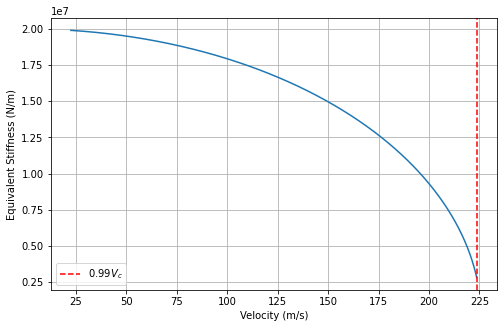

In [3]:

V_vals = np.linspace(0.1 * Vc, 0.99 * Vc, 1000)

# Compute equivalent stiffness
k_eq_vals = []
for V in V_vals:
    w_xi_0 = w_xi_func(0)
    k_eq = Q0 / w_xi_0
    k_eq_vals.append(k_eq)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(V_vals, k_eq_vals)
plt.axvline(0.99 * Vc, color='red', linestyle='--', label=r"$0.99 V_c$")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Equivalent Stiffness (N/m)")
plt.legend()
plt.grid()
plt.show()
